In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('../data/toy_2d.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

#inf = np.load('output/toy_multiclass_mlp_inf_results.npz')['influences'] # multiclass
inf = np.load('../data/toy2d_mlp_inf.npz')['influences']

inf_pos_order = np.flip(np.argsort(inf, axis=0), axis=0)
inf_neg_order = np.argsort(inf, axis=0)

In [3]:
# Check for zero influence values
zero_vals = []
for i in range(y_test.shape[0]):
    zero_inf = np.where(np.max(inf[:, i])==0)[0]
    if len(zero_inf) != 0:
        zero_vals.append(i)
print(zero_vals, len(zero_vals))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

/home/joonsikk/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


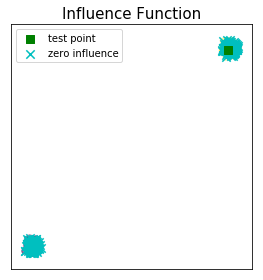

In [4]:
# Specify the test index
test_idx = 212
k = 5
idx_pos_order = inf_pos_order[:, test_idx]
idx_neg_order = inf_neg_order[:, test_idx]
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, alpha=0.3)

# plot training points with value zero

zero_inf = np.where(inf[:, test_idx]==0)[0]
zz = None
for i in zero_inf:
    zz = plt.scatter(x_train[i, 0], x_train[i, 1], c='c', marker='x', s=70, label='zero influence')
    
# Uncomment to plot the positive and negative class data points
#for i in range(k):
#    train_idx = idx_pos_order[i]
#    pp = plt.scatter(x_train[train_idx, 0], x_train[train_idx,1], c='b', marker='+', s=70, label='positive')
#for i in range(k):
#    train_idx = idx_neg_order[i]
#    nn = plt.scatter(x_train[train_idx, 0], x_train[train_idx,1], c='r', marker='_', s=70, label='negative')
    
tt = plt.scatter(x_test[test_idx, 0], x_test[test_idx, 1], c='g', marker='s', s=70, label='test point')

if zz is not None:
    plt.legend([tt, zz], ['test point', 'zero influence'])
else:
    plt.legend([tt], ['test point'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.axes().set_aspect('equal')
plt.title('Influence Function', fontsize=15)
plt.tight_layout()
plt.savefig('toy_inf.png', dpi=100)

In [5]:
import pickle
import torch

# Load data to compute the representer values
outputs = np.load('../data/toy2d_outputs.npz')
train_output34 = outputs['intermediate_train_output']
test_output34 = outputs['intermediate_test_output']
test_output36 = outputs['last_train_output']
train_output36 = outputs['last_test_output']
d = pickle.load(open('../data/weight_matrix_out_toy.pkl', 'rb'))
weight_matrix = d[0]

In [6]:
### Compute representer values
tensor_train34 = torch.FloatTensor(train_output34)
tensor_test34 = torch.FloatTensor(test_output34)
w_tensor = torch.FloatTensor(weight_matrix)

prod = torch.matmul(tensor_train34,torch.t(tensor_test34))
dd = y_test.flatten()
one_hot = np.eye(2)[dd]
one_hot_tensor = torch.FloatTensor(one_hot)
prod2 = torch.matmul(w_tensor, torch.t(one_hot_tensor))

inf_ours = torch.mul(prod, prod2)
inf_ours = inf_ours.cpu().numpy()

(0,)


/home/joonsikk/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


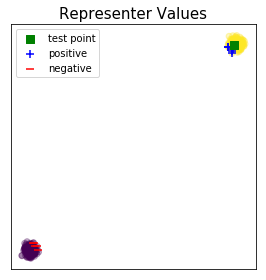

In [7]:
inf_pos_order = np.flip(np.argsort(inf_ours, axis=0), axis=0)
inf_neg_order = np.argsort(inf_ours, axis=0)

idx_pos_order = inf_pos_order[:, test_idx]
idx_neg_order = inf_neg_order[:, test_idx]
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, alpha=0.3)


# plot training points with value zero
zero_inf = np.where(inf_ours[:, test_idx]==0)[0]
print(zero_inf.shape)
zz = None
for i in zero_inf:
    zz = plt.scatter(x_train[i, 0], x_train[i, 1], c='c', marker='x', s=70, label='zero influence')

for i in range(k):
    train_idx = idx_pos_order[i]
    pp = plt.scatter(x_train[train_idx, 0], x_train[train_idx,1], c='b', marker='+', s=70, label='positive')
for i in range(k):
    train_idx = idx_neg_order[i]
    nn = plt.scatter(x_train[train_idx, 0], x_train[train_idx,1], c='r', marker='_', s=70, label='negative')
    
tt = plt.scatter(x_test[test_idx, 0], x_test[test_idx, 1], c='g', marker='s', s=70, label='test point')


if zz is not None:
    plt.legend([tt, pp, nn, zz], ['test point', 'positive', 'negative', 'zero influence'])
else:
    plt.legend([tt, pp, nn], ['test point', 'positive', 'negative'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.axes().set_aspect('equal')
plt.title('Representer Values', fontsize=15)
plt.tight_layout()
plt.savefig('toy_inf_ours.png', dpi=100)

/home/joonsikk/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


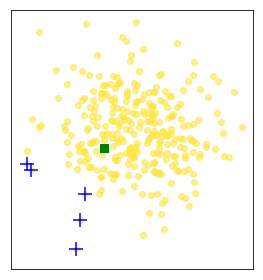

In [8]:
## zoom in to each cluster
plt.scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1], c='#FCE540', alpha=0.6)
plt.scatter(x_test[test_idx, 0], x_test[test_idx, 1], c='g', marker='s', s=80)
for i in range(k):
    train_idx = idx_pos_order[i]
    pp = plt.scatter(x_train[train_idx, 0], x_train[train_idx,1], c='b', marker='+', s=200, label='positive')
plt.xticks(())
plt.yticks(())
plt.axes().set_aspect('equal')
plt.tight_layout()
plt.savefig('class1.png', dpi=300)

/home/joonsikk/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


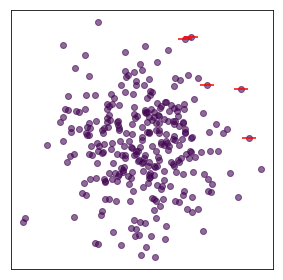

In [9]:
plt.scatter(x_train[y_train==0][:,0], x_train[y_train==0][:,1], c='#430753', alpha=0.6)
for i in range(k):
    train_idx = idx_neg_order[i]
    nn = plt.scatter(x_train[train_idx, 0], x_train[train_idx,1], c='r', marker='_', s=200, label='negative')
plt.xticks(())
plt.yticks(())
plt.axes().set_aspect('equal')
plt.tight_layout()
plt.savefig('class0.png', dpi=300)